<a href="https://colab.research.google.com/github/Julian27R/Trabajos/blob/main/SE%C3%91AL_CUANTIZADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

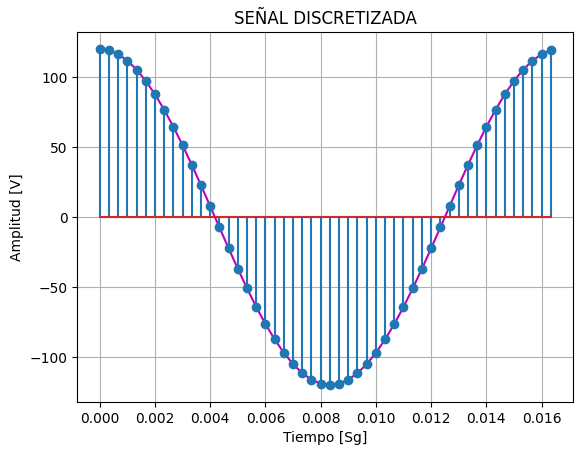

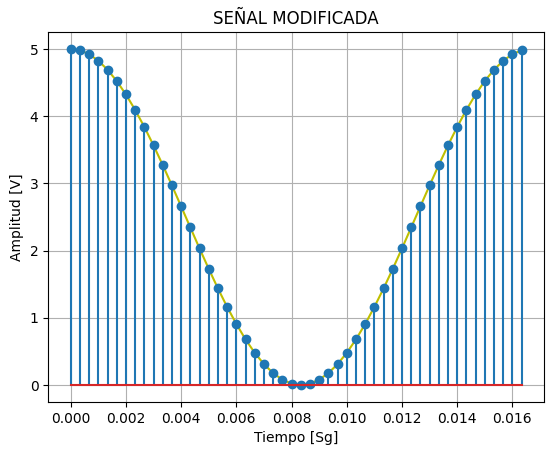

[5.         5.         5.         5.         5.         4.28571429
 4.28571429 4.28571429 3.57142857 3.57142857 3.57142857 2.85714286
 2.85714286 2.14285714 2.14285714 1.42857143 1.42857143 1.42857143
 0.71428571 0.71428571 0.71428571 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.71428571 0.71428571 0.71428571 1.42857143 1.42857143 1.42857143
 2.14285714 2.14285714 2.85714286 2.85714286 3.57142857 3.57142857
 3.57142857 4.28571429 4.28571429 4.28571429 5.         5.
 5.         5.        ]


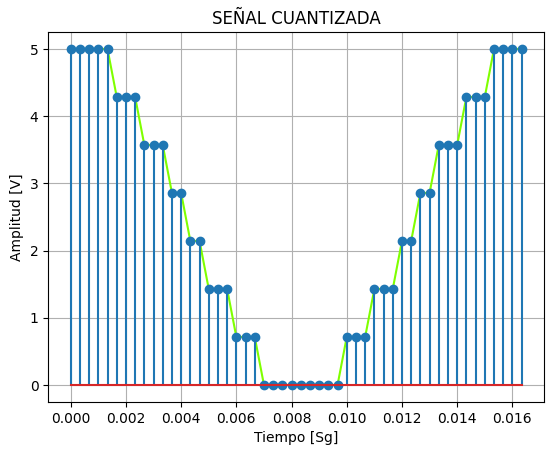

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#Datos señal Continua
A = 120
Fo = 60
To = 1/Fo
ti = 0
tf = To


#Discretizamos el tiempo
Fs = 50*Fo
Ts = 1/Fs
tv = np.arange(ti,tf,Ts)

#Discretizamos señal
xv = A*np.cos(2*np.pi*Fo*tv)


#Imprimimos señal discretizada
plt.plot(tv,xv,"m")
plt.stem(tv,xv)
plt.xlabel("Tiempo [Sg]")
plt.ylabel("Amplitud [V]")
plt.title("SEÑAL DISCRETIZADA")
plt.grid(True)
plt.show()

#Modificamos la Amplitud
y_max = 5
y_min = 0
def modificar_amplitud (x,ymax,ymin):
  xmax = max(x)
  xmin= min(x)
  m = (ymax-ymin)/(xmax-xmin)
  c = ymax - xmax*m
  yv = m*x + c
  return yv
yv = modificar_amplitud(xv,y_max,y_min)

#Imprimir la señal Modificada
plt.plot(tv,yv,"y")
plt.stem(tv,yv)
plt.xlabel("Tiempo [Sg]")
plt.ylabel("Amplitud [V]")
plt.title("SEÑAL MODIFICADA")
plt.grid(True)
plt.show()

#cuantizar la señal
nbits = 3
rmin = 0
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits)
d = cdist(yv.reshape(-1,1),ve.reshape(-1,1))
ind = np.argmin(d,axis=1)
vc= ve[ind]
print(vc)

#Finalmente imprimimos la señal cuantizada
plt.plot(tv,vc,"chartreuse")
plt.stem(tv,vc)
plt.xlabel("Tiempo [Sg]")
plt.ylabel("Amplitud [V]")
plt.title("SEÑAL CUANTIZADA")
plt.grid(True)
plt.show()





